In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("jointableadd.csv")

In [ ]:
dfi=pd.read_csv("in2021.csv")

In [ ]:
dfi.iloc[0,1]

'1/1/2021'

In [ ]:
df.head()

,ï»¿Incident #,Address,Inci_type,Content Loss,Property Loss,Total Loss,Pre-Incident Value,Amount Saved,ï»¿Inci_No,Inci_Date,...,Shift,Unit,Unit_Type,Disp_Time,Alarm_Time,Notif_Time,Roll_Time,Arv_Time,Num_ppl,Arrivalorder
0,21-0000521,3703 W WHEATMORE Louisville KY 40215,111 - Building fire,20000.0,100000.0,120000.0,"400,000.00","280,000.00",21-0000521,1/5/2021,...,2nd Platoon,FE10,11 - Engine,14:51.0,15:27.0,NaN,NaN,NaN,3,1
1,21-0002143,131 ROCHESTER Louisville KY 40214,111 - Building fire,NaN,60000.0,60000.0,"60,000.00",0,21-0002143,1/20/2021,...,2nd Platoon,FE12,11 - Engine,16:51.0,18:08.0,19:21.0,21:09.0,NaN,4,1
2,21-0003389,325 W MAIN Louisville KY 40202,111 - Building fire,50000.0,100000.0,150000.0,"50,000,000.00","49,850,000.00",21-0003389,2/2/2021,...,3rd Platoon,FB2,92 - Chief officer car,16:31.0,17:12.0,13:49.0,NaN,NaN,1,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-0003648,2/4/2021,...,3rd Platoon,FB3,92 - Chief officer car,05:42.0,05:59.0,07:50.0,07:52.0,NaN,2,1
4,21-0007327,314 N DR W J HODGE Louisville KY 40212,111 - Building fire,10000.0,30460.0,40460.0,"30,460.00","-10,000.00",21-0007327,3/11/2021,...,2nd Platoon,FE17,11 - Engine,00:20.0,01:17.0,NaN,NaN,NaN,4,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ï»¿Incident #       17 non-null     object 
 1   Address             17 non-null     object 
 2   Inci_type           17 non-null     object 
 3   Content Loss        12 non-null     float64
 4   Property Loss       17 non-null     float64
 5   Total Loss          17 non-null     float64
 6   Pre-Incident Value  17 non-null     object 
 7   Amount Saved        17 non-null     object 
 8   ï»¿Inci_No          25 non-null     object 
 9   Inci_Date           25 non-null     object 
 10  Exp_No              25 non-null     int64  
 11  Address.1           25 non-null     object 
 12  Zip                 25 non-null     int64  
 13  Census              25 non-null     float64
 14  Category            25 non-null     object 
 15  Inci_Type           25 non-null     object 
 16  FPU_Catego

In [ ]:
df['Content Loss'].fillna(0, inplace = True)

In [ ]:
df['Property Loss'].fillna(0, inplace = True)

In [ ]:
df['Amount Saved'] = df['Amount Saved'].str.replace(',', '').astype(float)
df['Amount Saved']=df['Amount Saved'].apply(pd.to_numeric)

In [ ]:
df['Pre-Incident Value'] = df['Pre-Incident Value'].str.replace(',', '').astype(float)
df['Pre-Incident Value']=df['Pre-Incident Value'].apply(pd.to_numeric)

In [ ]:
df["total_saved"]=df['Amount Saved']+df['Content Loss']

In [ ]:
df.head()

,ï»¿Incident #,Address,Inci_type,Content Loss,Property Loss,Total Loss,Pre-Incident Value,Amount Saved,ï»¿Inci_No,Inci_Date,...,Unit,Unit_Type,Disp_Time,Alarm_Time,Notif_Time,Roll_Time,Arv_Time,Num_ppl,Arrivalorder,total_saved
0,21-0000521,3703 W WHEATMORE Louisville KY 40215,111 - Building fire,20000.0,100000.0,120000.0,400000.0,280000.0,21-0000521,1/5/2021,...,FE10,11 - Engine,14:51.0,15:27.0,NaN,NaN,NaN,3,1,300000.0
1,21-0002143,131 ROCHESTER Louisville KY 40214,111 - Building fire,0.0,60000.0,60000.0,60000.0,0.0,21-0002143,1/20/2021,...,FE12,11 - Engine,16:51.0,18:08.0,19:21.0,21:09.0,NaN,4,1,0.0
2,21-0003389,325 W MAIN Louisville KY 40202,111 - Building fire,50000.0,100000.0,150000.0,50000000.0,49850000.0,21-0003389,2/2/2021,...,FB2,92 - Chief officer car,16:31.0,17:12.0,13:49.0,NaN,NaN,1,1,49900000.0
3,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,21-0003648,2/4/2021,...,FB3,92 - Chief officer car,05:42.0,05:59.0,07:50.0,07:52.0,NaN,2,1,NaN
4,21-0007327,314 N DR W J HODGE Louisville KY 40212,111 - Building fire,10000.0,30460.0,40460.0,30460.0,-10000.0,21-0007327,3/11/2021,...,FE17,11 - Engine,00:20.0,01:17.0,NaN,NaN,NaN,4,1,0.0


In [ ]:
print(df['Inci_type'].unique())

['111 - Building fire' nan]


In [ ]:
dfi.head()

,Inci_No,Inci_Date,Exp_No,Address,Zip,Census,Category,Inci_Type,FPU_Category,FPU,...,Shift,Unit,Unit_Type,Disp_Time,Alarm_Time,Notif_Time,Roll_Time,Arv_Time,Num_ppl,Arrivalorder
0,21-0000001,1/1/2021,0,532 N 17TH ST,40203,2300.00,4 - Hazardous Condition (No Fire),444 - Power line down,9 - Outside or Special Property,"960 - Street, other",...,1st Platoon,FE06,11 - Engine,08:29.0,08:42.0,08:42.0,10:13.0,14:31.0,4,1
1,21-0000002,1/1/2021,0,3131 DOGWOOD Drive,40220,91.03,6 - Good Intent Call,"661 - EMS call, party transported by non-fire ...",4 - Residential,419 - 1 or 2 family dwelling,...,1st Platoon,FE08,11 - Engine,12:36.0,14:54.0,14:54.0,16:14.0,20:15.0,4,1
2,21-0000003,1/1/2021,0,945 S 5TH ST,40203,5000.00,6 - Good Intent Call,"661 - EMS call, party transported by non-fire ...",4 - Residential,429 - Multifamily dwelling,...,1st Platoon,FE09,11 - Engine,13:37.0,15:43.0,15:43.0,17:26.0,20:33.0,4,1
3,21-0000004,1/1/2021,0,3860 FITZGERALD RD,40216,128.01,5 - Service Call,522 - Water or steam leak,NaN,NaN,...,1st Platoon,FE19,11 - Engine,15:37.0,16:40.0,16:40.0,18:00.0,24:08.0,4,1
4,21-0000005,1/1/2021,0,218 W FLORENCE Avenue,40214,4100.00,6 - Good Intent Call,622 - No incident found on arrival at dispatch...,4 - Residential,429 - Multifamily dwelling,...,1st Platoon,FE10,11 - Engine,28:23.0,29:10.0,29:10.0,31:05.0,NaN,3,1


In [ ]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39479 entries, 0 to 39478
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Inci_No       39479 non-null  object 
 1   Inci_Date     39479 non-null  object 
 2   Exp_No        39479 non-null  int64  
 3   Address       39390 non-null  object 
 4   Zip           39479 non-null  int64  
 5   Census        39330 non-null  float64
 6   Category      39331 non-null  object 
 7   Inci_Type     39331 non-null  object 
 8   FPU_Category  36115 non-null  object 
 9   FPU           36895 non-null  object 
 10  Station       39332 non-null  object 
 11  District      39331 non-null  float64
 12  Shift         39332 non-null  object 
 13  Unit          39479 non-null  object 
 14  Unit_Type     39477 non-null  object 
 15  Disp_Time     39458 non-null  object 
 16  Alarm_Time    39478 non-null  object 
 17  Notif_Time    39390 non-null  object 
 18  Roll_Time     37278 non-nu

In [ ]:
dfi.head()

,Inci_No,Inci_Date,Exp_No,Address,Zip,Census,Category,Inci_Type,FPU_Category,FPU,...,Shift,Unit,Unit_Type,Disp_Time,Alarm_Time,Notif_Time,Roll_Time,Arv_Time,Num_ppl,Arrivalorder
0,21-0000001,1/1/2021,0,532 N 17TH ST,40203,2300.00,4 - Hazardous Condition (No Fire),444 - Power line down,9 - Outside or Special Property,"960 - Street, other",...,1st Platoon,FE06,11 - Engine,08:29.0,08:42.0,08:42.0,10:13.0,14:31.0,4,1
1,21-0000002,1/1/2021,0,3131 DOGWOOD Drive,40220,91.03,6 - Good Intent Call,"661 - EMS call, party transported by non-fire ...",4 - Residential,419 - 1 or 2 family dwelling,...,1st Platoon,FE08,11 - Engine,12:36.0,14:54.0,14:54.0,16:14.0,20:15.0,4,1
2,21-0000003,1/1/2021,0,945 S 5TH ST,40203,5000.00,6 - Good Intent Call,"661 - EMS call, party transported by non-fire ...",4 - Residential,429 - Multifamily dwelling,...,1st Platoon,FE09,11 - Engine,13:37.0,15:43.0,15:43.0,17:26.0,20:33.0,4,1
3,21-0000004,1/1/2021,0,3860 FITZGERALD RD,40216,128.01,5 - Service Call,522 - Water or steam leak,NaN,NaN,...,1st Platoon,FE19,11 - Engine,15:37.0,16:40.0,16:40.0,18:00.0,24:08.0,4,1
4,21-0000005,1/1/2021,0,218 W FLORENCE Avenue,40214,4100.00,6 - Good Intent Call,622 - No incident found on arrival at dispatch...,4 - Residential,429 - Multifamily dwelling,...,1st Platoon,FE10,11 - Engine,28:23.0,29:10.0,29:10.0,31:05.0,NaN,3,1


In [ ]:
print(dfi['Category'].unique())

['4 - Hazardous Condition (No Fire)' '6 - Good Intent Call'
 '5 - Service Call' '9 - Special Incident Type'
 '7 - False Alarm & False Call'
 '3 - Rescue & Emergency Medical Service Incident' '1 - Fire'
 '2 - Overpressure Rupture, Explosion, Overheat (No Fire)'
 '8 - Severe Weather & Natural Disaster' nan]


In [ ]:
C1= dfi.loc[dfi["Category"]=='1 - Fire'].count()[0]
C2= dfi.loc[dfi["Category"]=='2 - Overpressure Rupture, Explosion, Overheat (No Fire)'].count()[0]
C3= dfi.loc[dfi["Category"]=='3 - Rescue & Emergency Medical Service Incident'].count()[0]
C4= dfi.loc[dfi["Category"]=='4 - Hazardous Condition (No Fire)'].count()[0]
C5= dfi.loc[dfi["Category"]=='5 - Service Call'].count()[0]
C6= dfi.loc[dfi["Category"]=='6 - Good Intent Call'].count()[0]
C7= dfi.loc[dfi["Category"]=='7 - False Alarm & False Call'].count()[0]
C8= dfi.loc[dfi["Category"]=='8 - Severe Weather & Natural Disaster'].count()[0]
C9= dfi.loc[dfi["Category"]=='9 - Special Incident Type'].count()[0]


print(C1,C2,C3,C4,C5,C6,C7,C8,C9)

1879 55 20471 1997 1389 9269 4256 3 12


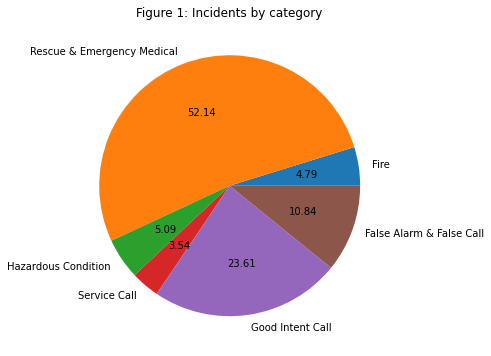

In [ ]:
plt.figure(figsize=(6,6))
labels = ['Fire','Rescue & Emergency Medical','Hazardous Condition','Service Call','Good Intent Call','False Alarm & False Call']

plt.pie([C1,C3,C4,C5,C6,C7], labels = labels, autopct = '%.2f')
plt.title("Figure 1: Incidents by category")

plt.savefig("Figure 1: Incidents by category")

In [ ]:
dff=dfi.loc[(dfi["Category"] == '1 - Fire')]

In [ ]:
dff.count()

Inci_No         1879
Inci_Date       1879
Exp_No          1879
Address         1868
Zip             1879
Census          1879
Category        1879
Inci_Type       1879
FPU_Category    1677
FPU             1737
Station         1879
District        1879
Shift           1879
Unit            1879
Unit_Type       1879
Disp_Time       1860
Alarm_Time      1879
Notif_Time      1831
Roll_Time       1710
Arv_Time        1183
Num_ppl         1879
Arrivalorder    1879
dtype: int64

In [ ]:
print(dff["Inci_Type"].unique())

['111 - Building fire' '150 - Outside rubbish fire, other'
 '151 - Outside rubbish, trash or waste fire'
 '154 - Dumpster or other outside trash receptacle fire'
 '118 - Trash or rubbish fire, contained'
 '113 - Cooking fire, confined to container'
 '112 - Fires in structure other than in a building'
 '131 - Passenger vehicle fire'
 '114 - Chimney or flue fire, confined to chimney or flue'
 '140 - Natural vegetation fire, other' '161 - Outside storage fire'
 '121 - Fire in mobile home used as fixed residence'
 '160 - Special outside fire, other'
 '142 - Brush or brush-and-grass mixture fire'
 '116 - Fuel burner/boiler malfunction, fire confined'
 '164 - Outside mailbox fire'
 '132 - Road freight or transport vehicle fire' '100 - Fire, other'
 '143 - Grass fire' '130 - Mobile property (vehicle) fire, other'
 '162 - Outside equipment fire' '141 - Forest, woods or wildland fire'
 '134 - Water vehicle fire'
 '136 - Self-propelled motor home or recreational vehicle'
 '155 - Outside stationa

In [ ]:
df.head()

,ï»¿Incident #,Address,Inci_type,Content Loss,Property Loss,Total Loss,Pre-Incident Value,Amount Saved,ï»¿Inci_No,Inci_Date,...,Unit,Unit_Type,Disp_Time,Alarm_Time,Notif_Time,Roll_Time,Arv_Time,Num_ppl,Arrivalorder,total_saved
0,21-0000521,3703 W WHEATMORE Louisville KY 40215,111 - Building fire,20000.0,100000.0,120000.0,400000.0,280000.0,21-0000521,1/5/2021,...,FE10,11 - Engine,14:51.0,15:27.0,NaN,NaN,NaN,3,1,300000.0
1,21-0002143,131 ROCHESTER Louisville KY 40214,111 - Building fire,0.0,60000.0,60000.0,60000.0,0.0,21-0002143,1/20/2021,...,FE12,11 - Engine,16:51.0,18:08.0,19:21.0,21:09.0,NaN,4,1,0.0
2,21-0003389,325 W MAIN Louisville KY 40202,111 - Building fire,50000.0,100000.0,150000.0,50000000.0,49850000.0,21-0003389,2/2/2021,...,FB2,92 - Chief officer car,16:31.0,17:12.0,13:49.0,NaN,NaN,1,1,49900000.0
3,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,21-0003648,2/4/2021,...,FB3,92 - Chief officer car,05:42.0,05:59.0,07:50.0,07:52.0,NaN,2,1,NaN
4,21-0007327,314 N DR W J HODGE Louisville KY 40212,111 - Building fire,10000.0,30460.0,40460.0,30460.0,-10000.0,21-0007327,3/11/2021,...,FE17,11 - Engine,00:20.0,01:17.0,NaN,NaN,NaN,4,1,0.0


In [ ]:
print(df['FPU_Category'].unique())

['1 - Assembly' '7 - Manufacturing, Processing' '5 - Mercantile, Business'
 '3 - Health Care, Detention & Correction' '8 - Storage' '2 - Educational']


In [ ]:
F1= df.loc[df['FPU_Category']=='1 - Assembly'].count()[0]
F2= df.loc[df['FPU_Category']=='8 - Storage'].count()[0]
F3= df.loc[df['FPU_Category']=='3 - Health Care, Detention & Correction'].count()[0]
F4= df.loc[df['FPU_Category']=='7 - Manufacturing, Processing'].count()[0]
F5= df.loc[df['FPU_Category']=='5 - Mercantile, Business'].count()[0]
F6= df.loc[df['FPU_Category']=='2 - Educational'].count()[0]


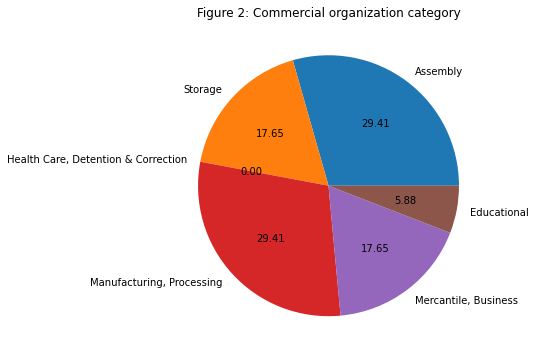

In [ ]:
plt.figure(figsize=(6,6))
labels = ['Assembly','Storage','Health Care, Detention & Correction','Manufacturing, Processing','Mercantile, Business','Educational']

plt.pie([F1,F2,F3,F4,F5,F6], labels = labels, autopct = '%.2f')
plt.title("Figure 2: Commercial organization category")

plt.savefig("Figure 2: Commercial organization category")

In [ ]:
Ass_Loss = df.loc[df['FPU_Category']=='1 - Assembly']["Total Loss"].sum()
Sto_Loss = df.loc[df['FPU_Category']=='8 - Storage']["Total Loss"].sum()
Hea_Loss = df.loc[df['FPU_Category']=='3 - Health Care, Detention & Correction']["Total Loss"].sum()
Manu_Loss = df.loc[df['FPU_Category']=='7 - Manufacturing, Processing']["Total Loss"].sum()
Mer_Loss = df.loc[df['FPU_Category']=='5 - Mercantile, Business']["Total Loss"].sum()
Edu_Loss = df.loc[df['FPU_Category']=='2 - Educational']["Total Loss"].sum()
print(Ass_Loss, Sto_Loss, Hea_Loss,Manu_Loss,Mer_Loss,Edu_Loss)

1247460.0 230000.0 0.0 2540000.0 157000.0 2500.0


In [ ]:
Ass_C = df.loc[df['FPU_Category']=='1 - Assembly'].count()[0]
Sto_C = df.loc[df['FPU_Category']=='8 - Storage'].count()[0]
Hea_C = df.loc[df['FPU_Category']=='3 - Health Care, Detention & Correction'].count()[0]
Manu_C = df.loc[df['FPU_Category']=='7 - Manufacturing, Processing'].count()[0]
Mer_C = df.loc[df['FPU_Category']=='5 - Mercantile, Business'].count()[0]
Edu_C = df.loc[df['FPU_Category']=='2 - Educational'].count()[0]
print(Ass_C,Sto_C,Hea_C,Manu_C,Mer_C,Edu_C)

5 3 0 5 3 1


In [ ]:
names = ["Manufacturing, Processing","Assembly", "Storage", "Mercantile, Business","Educational", "Health Care, Detention & Correction"]
values = [Manu_Loss, Ass_Loss,Sto_Loss,Mer_Loss,Edu_Loss, Hea_Loss]

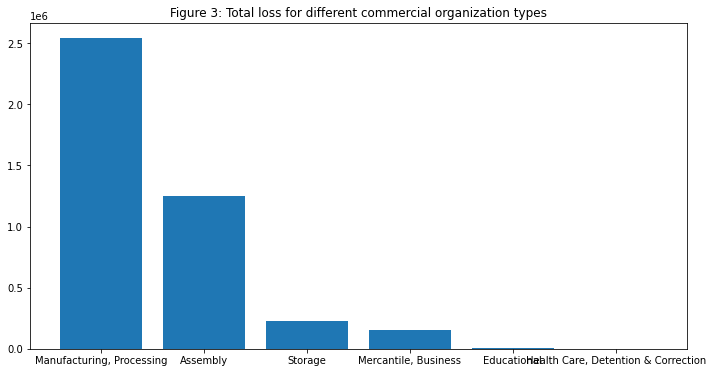

In [ ]:
plt.figure(figsize=(40, 6))

plt.subplot(131)
plt.bar(names, values)
plt.title('Figure 3: Total loss for different commercial organization types')
plt.savefig('Figure 3: Total loss for different commercial organization types')

In [ ]:
print(sum([Manu_Loss, Ass_Loss,Sto_Loss,Mer_Loss,Edu_Loss, Hea_Loss]))

4176960.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ï»¿Incident #       17 non-null     object 
 1   Address             17 non-null     object 
 2   Inci_type           17 non-null     object 
 3   Content Loss        25 non-null     float64
 4   Property Loss       25 non-null     float64
 5   Total Loss          17 non-null     float64
 6   Pre-Incident Value  17 non-null     float64
 7   Amount Saved        17 non-null     float64
 8   ï»¿Inci_No          25 non-null     object 
 9   Inci_Date           25 non-null     object 
 10  Exp_No              25 non-null     int64  
 11  Address.1           25 non-null     object 
 12  Zip                 25 non-null     int64  
 13  Census              25 non-null     float64
 14  Category            25 non-null     object 
 15  Inci_Type           25 non-null     object 
 16  FPU_Catego

In [ ]:
df["Positive saved"] = df.loc[:,"Amount Saved"].apply(lambda x: (x+abs(x))//2)

In [ ]:
df[["Positive saved", "Amount Saved"]].head(30)

,Positive saved,Amount Saved
0,280000.0,280000.0
1,0.0,0.0
2,49850000.0,49850000.0
3,NaN,NaN
4,0.0,-10000.0
5,107990.0,107990.0
6,1129550.0,1129550.0
7,NaN,NaN
8,0.0,-10000.0
9,NaN,NaN


In [ ]:
Ass_s = df.loc[df['FPU_Category']=='1 - Assembly']["Positive saved"].sum()
Sto_s = df.loc[df['FPU_Category']=='8 - Storage']["Positive saved"].sum()
Hea_s = df.loc[df['FPU_Category']=='3 - Health Care, Detention & Correction']["Positive saved"].sum()
Manu_s = df.loc[df['FPU_Category']=='7 - Manufacturing, Processing']["Positive saved"].sum()
Mer_s = df.loc[df['FPU_Category']=='5 - Mercantile, Business']["Positive saved"].sum()
Edu_s = df.loc[df['FPU_Category']=='2 - Educational']["Positive saved"].sum()
print(Ass_s,Sto_s,Hea_s, Manu_s,Mer_s,Edu_s)

2776150.0 8992040.0 0.0 612990.0 52987240.0 997500.0


In [ ]:
eg = pd.DataFrame([[-4, 9],[2,4],[1,2]] , columns=['A', 'B'])
eg["A"]=eg.loc[:,"A"].apply(lambda x: (x+abs(x))//2)
eg

,A,B
0,0,9
1,2,4
2,1,2
